<a href="https://colab.research.google.com/github/MojaHorse/Buddy/blob/main/CropsTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

dataset_path = "/content/drive/MyDrive/Crop_Disease_Dataset/Preprocessed data"
class_names = sorted(os.listdir(dataset_path))
print(f"Found {len(class_names)} classes:\n")
for name in class_names:
    full_path = os.path.join(dataset_path, name)
    if os.path.isdir(full_path):  # Check if the entry is a directory
        count = len(os.listdir(full_path))
        print(f"{name}: {count} images")

Found 11 classes:

Bacterial_spot227: 1702 images
Early_blight227: 800 images
Late_blight227: 1528 images
Leaf_Mold227: 762 images
Septoria_leaf_spot227: 1417 images
Target_Spot227: 1124 images
Tomato_Yellow_Leaf_Curl_Virus227: 4286 images
Tomato_mosaic_virus227: 299 images
Two-spotted_spider_mite227: 1341 images
healthy227: 1272 images


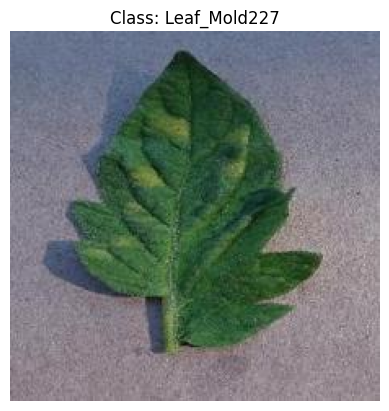

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

sample_class = random.choice(class_names)
sample_path = os.path.join(dataset_path, sample_class)
img_name = random.choice(os.listdir(sample_path))
img_path = os.path.join(sample_path, img_name)

img = mpimg.imread(img_path)
plt.imshow(img)
plt.title(f"Class: {sample_class}")
plt.axis('off')
plt.show()

In [22]:
import os
import shutil
import random

original_path = "/content/drive/MyDrive/Crop_Disease_Dataset/Preprocessed data"
split_path = "/content/drive/MyDrive/Crop_Disease_Dataset/Crop_Disease_Split"

selected_classes = [
    "Tomato_Yellow_Leaf_Curl_Virus227",
    "healthy227",
    "Bacterial_spot227",
    "Early_blight227",
    "Late_blight227"
]

train_ratio = 0.8

for split in ['train', 'val']:
    for cls in selected_classes:
        dir_path = os.path.join(split_path, split, cls)
        os.makedirs(dir_path, exist_ok=True)

for cls in selected_classes:
    images = os.listdir(os.path.join(original_path, cls))
    random.shuffle(images)
    split_idx = int(len(images) * train_ratio)
    train_images = images[:split_idx]
    val_images = images[split_idx:]

    for img in train_images:
        src = os.path.join(original_path, cls, img)
        dst = os.path.join(split_path, 'train', cls, img)
        shutil.copyfile(src, dst)

    for img in val_images:
        src = os.path.join(original_path, cls, img)
        dst = os.path.join(split_path, 'val', cls, img)
        shutil.copyfile(src, dst)

print("✅ Dataset split complete!")

✅ Dataset split complete!


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
print("Done")

Done


In [28]:
train_dir = '/content/drive/MyDrive/Crop_Disease_Dataset/Crop_Disease_Split/train'
val_dir = '/content/drive/MyDrive/Crop_Disease_Dataset/Crop_Disease_Split/val'

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
print("Done")

Found 7668 images belonging to 5 classes.
Found 1920 images belonging to 5 classes.
Done


In [31]:
#Build CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
print("Done")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done


In [33]:
#Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Done")

Done


In [34]:
#Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # You can increase this later
)
print("Done")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5873 - loss: 1.0595

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - accuracy: 0.5878 - loss: 1.0584 - val_accuracy: 0.8427 - val_loss: 0.4078
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.8267 - loss: 0.4693 - val_accuracy: 0.8750 - val_loss: 0.3389
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.8814 - loss: 0.3340 - val_accuracy: 0.9099 - val_loss: 0.2519
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.8907 - loss: 0.3021 - val_accuracy: 0.8828 - val_loss: 0.3484
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.9063 - loss: 0.2696 - val_accuracy: 0.9370 - val_loss: 0.1563
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.9095 - loss: 0.2470 - val_accuracy: 0.9266 - val_loss: 0.1954
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.9215 - loss: 0.2207 - val_accuracy: 0.9370 - val_loss: 0.1768
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.9292 - loss: 0.1979 - val_accuracy: 0.926

In [35]:
model.save('/content/drive/MyDrive/Crop_Disease_Dataset/crop_disease_model.h5')
print("Saved")

Saved


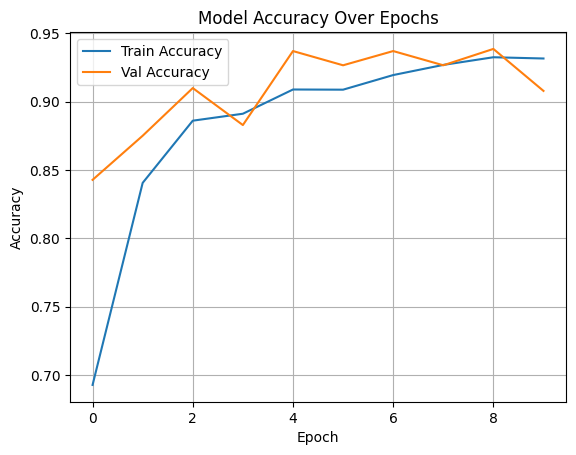

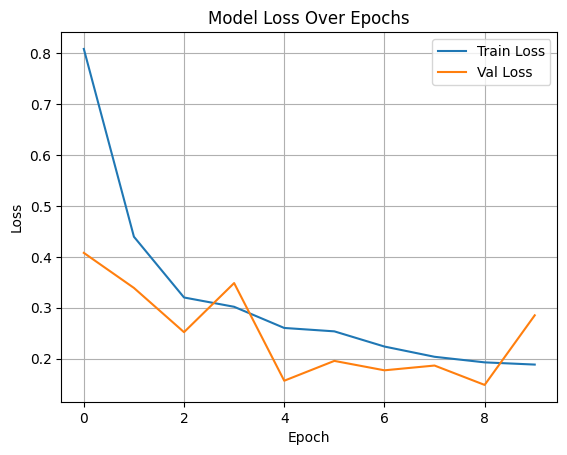

In [36]:
import matplotlib.pyplot as plt

#For Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#For Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 433ms/step


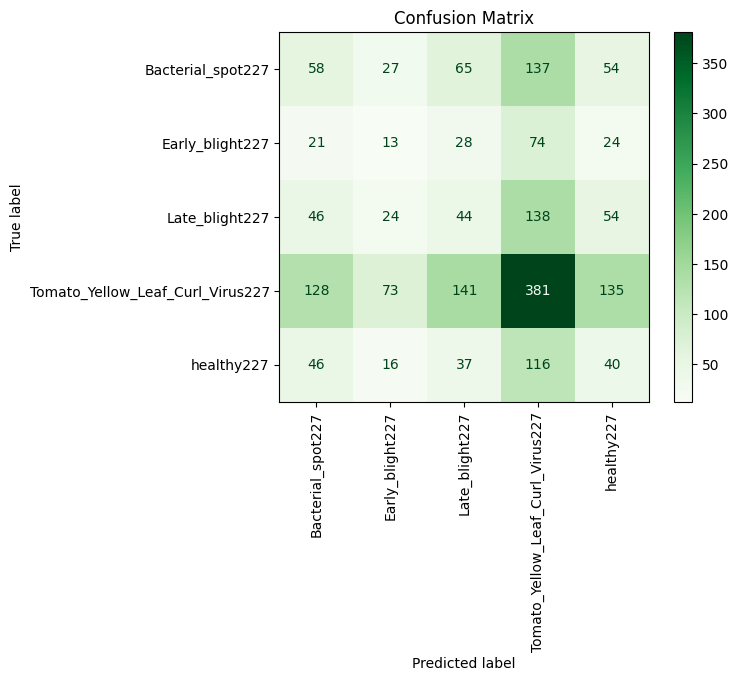

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val_data.reset()
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Greens', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


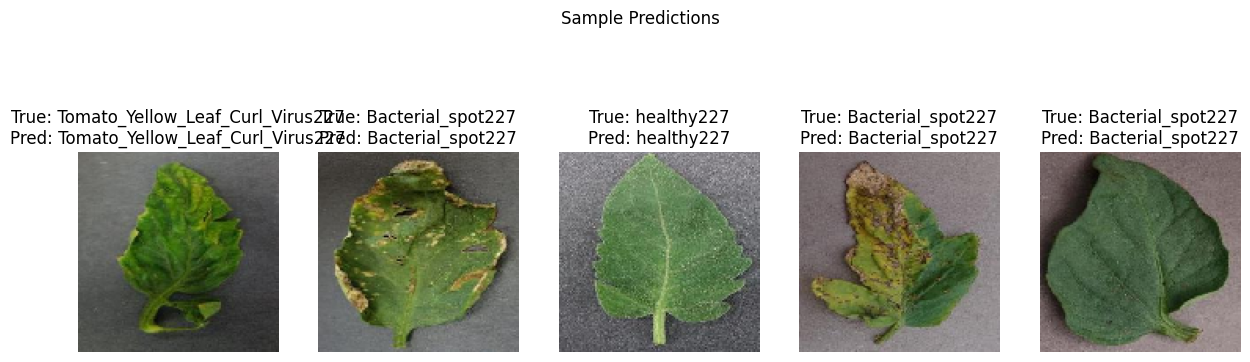

In [41]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(val_data)
preds = model.predict(x_batch)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_batch, axis=1)
labels_map = list(val_data.class_indices.keys())

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_batch[i])
    plt.title(f"True: {labels_map[true_labels[i]]}\nPred: {labels_map[pred_labels[i]]}")
    plt.axis('off')
plt.suptitle("Sample Predictions")
plt.show()


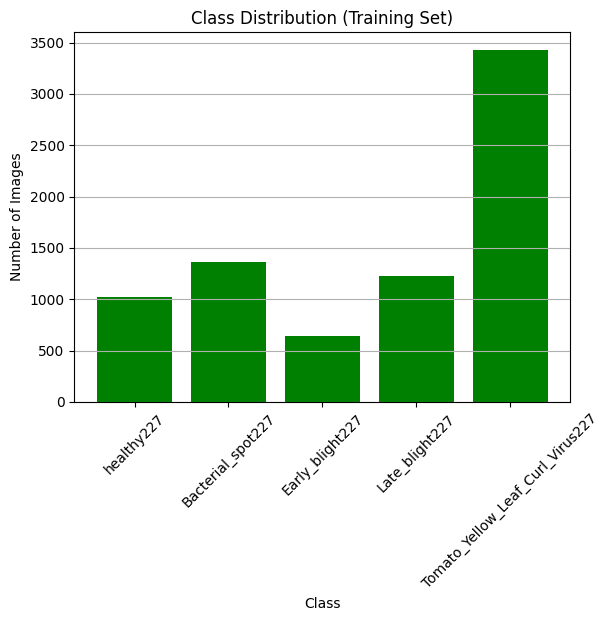

In [42]:
import os

class_counts = {}
for class_name in os.listdir(train_dir):
    class_counts[class_name] = len(os.listdir(os.path.join(train_dir, class_name)))

# Bar chart
plt.bar(class_counts.keys(), class_counts.values(), color='green')
plt.title("Class Distribution (Training Set)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


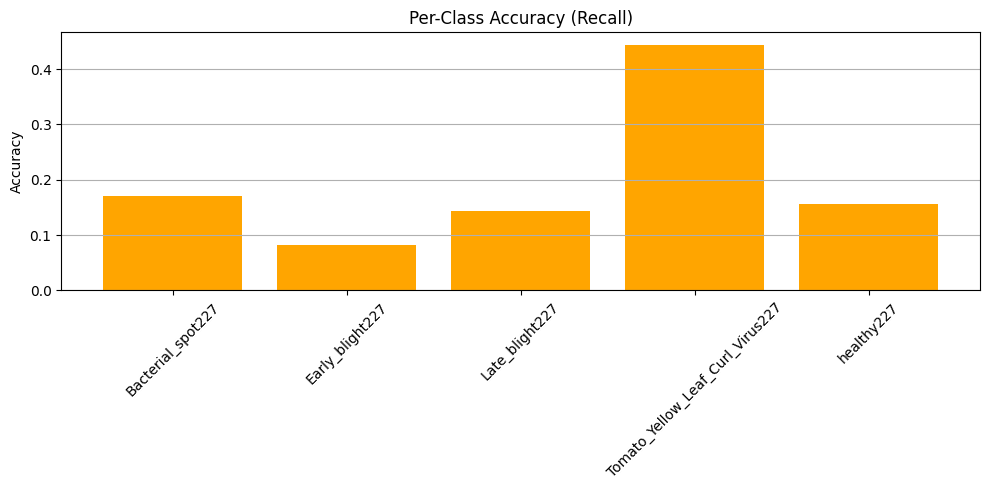

In [43]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

# Extract per-class accuracy (a.k.a. recall here)
per_class_accuracy = {label: report[label]['recall'] for label in class_labels}

# Bar plot
plt.figure(figsize=(10,5))
plt.bar(per_class_accuracy.keys(), per_class_accuracy.values(), color='orange')
plt.title("Per-Class Accuracy (Recall)")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [44]:
wrong_idx = np.where(pred_labels != true_labels)[0]

plt.figure(figsize=(15, 5))
for i, idx in enumerate(wrong_idx[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_batch[idx])
    plt.title(f"True: {labels_map[true_labels[idx]]}\nPred: {labels_map[pred_labels[idx]]}")
    plt.axis('off')
plt.suptitle("Misclassified Images")
plt.show()


<Figure size 1500x500 with 0 Axes>

Found 7668 images belonging to 5 classes.


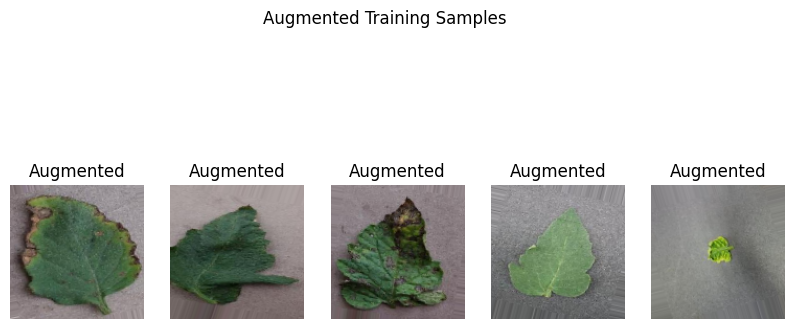

In [46]:
aug_iter = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=1
)

x_aug, y_aug = next(aug_iter)
plt.figure(figsize=(10, 5))
for i in range(5):
    x_aug, y_aug = next(aug_iter)
    plt.subplot(1, 5, i+1)
    plt.imshow(x_aug[0])
    plt.title("Augmented")
    plt.axis('off')
plt.suptitle("Augmented Training Samples")
plt.show()
